📁 Please upload your content image (e.g., content.jpg)


Saving photo-1501594907352-04cda38ebc29.jpg to photo-1501594907352-04cda38ebc29.jpg

📁 Please upload your style image (e.g., style.jpg)


Saving photo-1507525428034-b723cf961d3e.jpg to photo-1507525428034-b723cf961d3e.jpg

⏳ Loading TensorFlow Hub model...
✅ Model loaded successfully!


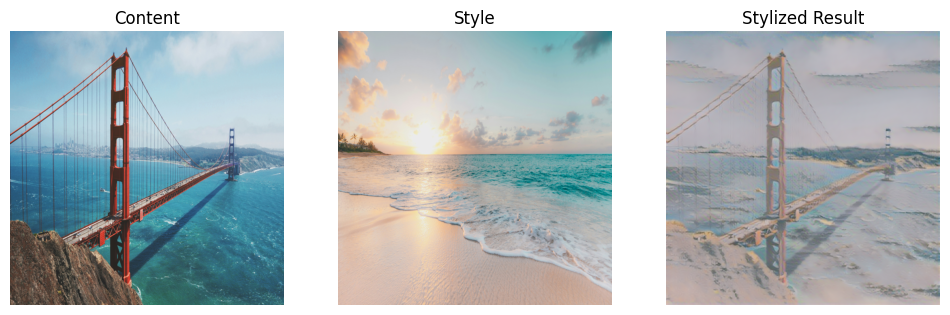


✅ Saved 'stylized_output.png' to your workspace!


In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import os


def load_img_url(url, max_dim=512):
    """
    Download and preprocess an image from a URL.
    Includes browser-like headers to avoid 403 errors.
    """
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    response = requests.get(url, headers=headers, timeout=10)
    if response.status_code != 200:
        raise Exception(f"Failed to download image: {url} (status {response.status_code})")

    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img)
    img = img[tf.newaxis, :]
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img



def load_img_path(path, max_dim=512):
    """
    Load an image from a local path (e.g., uploaded file in Colab).
    """
    img = Image.open(path).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img)
    img = img[tf.newaxis, :]
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img



use_offline = True  # 🔁 set to False if you want to use URLs directly

if not use_offline:

    content_url = "https://images.unsplash.com/photo-1507525428034-b723cf961d3e"
    style_url = "https://images.unsplash.com/photo-1501594907352-04cda38ebc29"
    content_image = load_img_url(content_url)
    style_image = load_img_url(style_url)

else:

    from google.colab import files

    print("📁 Please upload your content image (e.g., content.jpg)")
    uploaded1 = files.upload()
    content_path = list(uploaded1.keys())[0]

    print("\n📁 Please upload your style image (e.g., style.jpg)")
    uploaded2 = files.upload()
    style_path = list(uploaded2.keys())[0]

    content_image = load_img_path(content_path)
    style_image = load_img_path(style_path)

print("\n⏳ Loading TensorFlow Hub model...")
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")
print("✅ Model loaded successfully!")

stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Content")
plt.imshow(np.squeeze(content_image))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Style")
plt.imshow(np.squeeze(style_image))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Stylized Result")
plt.imshow(np.squeeze(stylized_image))
plt.axis('off')

plt.show()

save_img = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
save_img = tf.squeeze(save_img)
output_filename = "stylized_output.png"
Image.fromarray(save_img.numpy()).save(output_filename)

print(f"\n✅ Saved '{output_filename}' to your workspace!")
